# Classification 
Ideas to try 
- [] MinMax scaling?

In [2]:
# import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import scipy
from scipy.sparse.linalg import svds 

In [3]:
data = pd.read_csv("mirnas_all_nov21.txt", sep="\t")
labels = pd.read_csv("mirnas_all_labels_nov21.txt", sep="\t")

In [4]:
labels.head()

,Dataset_id,Class_id,Class_name,Sample_id,Cancer_type,Cancer_subtype,Metastasis_status,Primary_site,Metastasis_site,Sample_label
0,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279964,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
1,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279974,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
2,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279975,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
3,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279977,breast cancer,NaN,YES,breast,lung,Metastasis Tumor
4,GSE11078,1,metastasis tumor of breast cancer lung metastasis,GSM279978,breast cancer,NaN,YES,breast,lung,Metastasis Tumor


In [5]:
data=data.drop(['Unnamed: 0'], axis=1)
data.set_index('ID_REF')
data.head()

,ID_REF,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,...,GSM237966,GSM237967,GSM237968,GSM237969,GSM237970,GSM237972,GSM237973,GSM237974,GSM237977,GSM237978
0,1007_s_at,10.022909,9.818693,9.647424,9.841938,9.190691,10.214065,10.284017,7.008211,9.145673,...,3739.4300,2809.7200,2350.390,4079.3500,7302.00000,2898.6400,3494.1600,5225.7500,5917.5400,4249.9400
1,1053_at,6.411660,5.665370,5.613482,5.190008,5.180046,6.396298,6.048790,5.671556,5.624627,...,1205.6400,883.9270,1418.130,721.6150,641.33900,1009.4900,788.6240,1227.7000,662.1490,1315.5500
2,117_at,6.181633,5.700626,5.786576,5.237599,6.131352,7.620443,6.481317,5.739559,6.072929,...,89.1387,81.6689,366.327,151.8190,191.91400,134.4140,67.0623,104.0020,15.1112,119.9420
3,121_at,7.436633,7.053211,7.258615,7.562595,7.330315,7.364233,7.421833,7.620457,7.507055,...,787.3290,848.5340,1454.480,1142.3000,1099.31000,762.8810,408.8580,684.3200,612.0700,809.6950
4,1255_g_at,2.887094,3.000947,3.121344,3.086248,3.480671,2.905494,2.968376,3.221801,3.069448,...,80.9794,30.6078,103.337,36.9773,5.61104,92.5094,30.6197,17.8383,11.1367,93.9161


In [6]:
# check to make sure there are no more repeats
count = 0
for i in data.columns:
    if "." in i:
        count+=1
print(count)

0


## Playing with SKlearn's PCA

In [7]:
data.shape

(54675, 1495)

In [10]:
#pca = PCA(n_components=1000)

In [11]:
#pca.fit(data)

In [12]:
#pca.n_features_

In [8]:
# jiaqi's PCA (very slow, uses eigsh)
def PCA(x, k):
    # Z = W * X
    # Z is weight matrix 
    # W is feature matrix 
    # X is input 
    
    # get zero mean, column-wise
    means = np.mean(x.T, axis=1)
    x_mean = x - means
    
    # covariance of centered/zero-mean matrix
    #V = np.cov(x_mean)
    V = x_mean.dot(x_mean.T) / (x_mean.shape[1]-1)

    # eigendecomposition 
    # y = lambda (eigen values)
    # u = eigen vectors 
    y, u = scipy.sparse.linalg.eigsh(V, k = k)
    
    # project data
    #P = u.T.dot(x_mean)
    

    # diagonalization to get feature matrix 
    #w = np.dot(np.diag(1/np.sqrt(y)), u.T)
    
    # w is features 
    #w = np.diag( 1.0/np.sqrt(y)).dot(u.T)
    w = np.linalg.inv(np.diag(np.sqrt(y))).dot(u.T)
    print(np.diag(np.sqrt(y)).shape)
    # check identity 
    # print(np.round(np.dot(np.dot(w,V),w.T),3))
    
    # z is weights 
    z = np.dot(w, x_mean)
    
    return w, z, y, u

In [8]:
# tiffany's PCA, uses SVD
def PCA(PCA_K, input_data):

    total_dim, sample_n = input_data.shape

    data_mean = np.reshape(np.mean(input_data, axis=1),(total_dim,1))
    data_demean = np.subtract(input_data, data_mean)

    u, s, vt = svds(data_demean, k=PCA_K)

    PCA_weights = np.matmul(np.transpose(u), data_demean)
    
    return PCA_weights, u, s, data_mean


In [9]:
# will need these to recreate data frame later
data_heading=data.columns
id_refs=data['ID_REF']

In [10]:
np_data = np.array(data)[:,1:].astype(float)

In [11]:
np_data.shape

(54675, 1494)

In [13]:
# #s[300:373]
# temp = np_data[:1000,:1000]
# temp.shape

In [12]:
weights, u, s, mean = PCA(500,np_data)

In [62]:
# pca_data = np.matmul(np.transpose(u[:,300:373]), np.subtract(np_data,mean))
# pca_data = np.matmul(np.transpose(u), np.subtract(np_data,mean))

In [15]:
weights.shape

(500, 1494)

### playing around with pca
s is the singular values 
we chose cut off of ~ 50-73

In [16]:
max(s)

13755318.951722277

In [66]:
s

array([   15313.44116949,    15483.48968787,    15551.66167892,
          15773.07493726,    15834.32917904,    15979.95665953,
          16097.66115904,    16224.871642  ,    16365.85013889,
          16436.25573251,    16561.23803922,    16759.52260636,
          16858.31929605,    16998.96292533,    17116.98339905,
          17201.66374048,    17493.83324082,    17604.68758288,
          17719.81136442,    17800.06948042,    17955.63987765,
          18081.52540955,    18213.0463633 ,    18460.47374714,
          18501.3306362 ,    18667.19611856,    18989.46274134,
          19003.30983394,    19154.05381223,    19324.61225084,
          19419.37225232,    19653.55541588,    19720.72434878,
          19840.29324231,    19913.78321118,    20177.10022245,
          20387.49153117,    20523.04578638,    20676.60215167,
          20997.3216839 ,    21029.93227508,    21164.50995533,
          21378.73932904,    21543.23383721,    21777.7858658 ,
          21972.2807735 ,    22019.16019

In [17]:
cut_off=250749

In [18]:
len(s[s>cut_off])

88

<Container object of 88 artists>

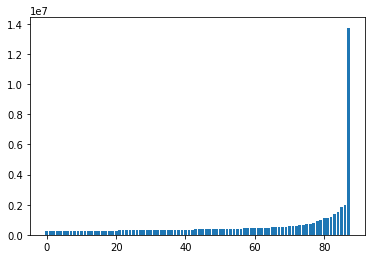

In [19]:
plt.bar(xrange(0,len(s[s>cut_off])), s[s>cut_off])

#### pick 88...it looks alright! 

### After playing with the number of features, for random forest, using 30 features produces the best result

In [58]:
pca_data = np.matmul(np.transpose(u[:,470:]), np.subtract(np_data,mean))

In [59]:
pca_data.shape

(30, 1494)

## Split into train/test

In [22]:
pd_pca=pd.DataFrame(pca_data)

In [23]:
# data_heading=data.columns
# id_refs=data['ID_REF']

In [24]:
# idk i just realized we dont need to make it into a pandas data frame again lol 
pd_pca.columns=data.columns[1:]
pd_pca['ID_REF'] = id_refs

In [25]:
pd_pca.head()

,GSM279964,GSM279974,GSM279975,GSM279977,GSM279978,GSM279958,GSM279961,GSM279963,GSM279965,GSM279966,...,GSM237967,GSM237968,GSM237969,GSM237970,GSM237972,GSM237973,GSM237974,GSM237977,GSM237978,ID_REF
0,95.312229,99.291119,95.521275,93.516540,93.081082,101.127912,94.533292,95.698684,92.293085,98.474330,...,9924.003178,2189.256915,16604.629802,4788.818771,1823.146022,-9226.431358,-4420.696803,-3686.459383,-6508.527746,1007_s_at
1,105.609445,112.235462,112.573960,111.561841,110.114083,109.059368,114.451374,114.845386,112.246472,114.120025,...,10882.193140,15683.321996,8771.751590,8164.586773,-18523.063187,151.115232,-15253.904055,-7195.018207,-4315.597853,1053_at
2,85.961664,84.970256,87.544683,86.511555,83.360429,88.387995,86.675480,84.013045,85.128853,82.700081,...,-4011.237285,-4981.789303,-19290.985826,23252.847245,-9999.016836,-3320.240436,8909.308126,31152.192698,1484.255191,117_at
3,134.784272,126.039423,127.877559,129.596287,123.834448,130.087550,129.386767,133.402212,131.081294,131.378828,...,3516.958898,-5354.139147,4377.224050,13630.256635,5592.716154,1890.855251,2235.272687,-1576.614774,7556.317986,121_at
4,26.340300,29.589796,31.485159,27.969214,28.882511,25.551609,30.398438,20.397305,20.048079,19.020653,...,-8107.560772,2028.899506,-733.089184,-6012.754505,13756.158461,-16887.887000,-19492.931399,-2465.982008,-16870.750514,1255_g_at


In [93]:
#pd_pca.to_csv("mirnas_all_pca_500_88.txt", sep="\t")

In [14]:
# need data to be back in numpy to work with lolol
pca_data.shape

(88, 1494)

In [15]:
# get labels 
sample_labels=labels['Sample_label'].values

In [16]:
sample_labels = ['Normal' if x=='Metastasis Normal' or x=='Primary Normal' else x for x in labels['Sample_label'].values]
sample_labels=np.asarray(sample_labels)

In [17]:
np.unique(sample_labels,return_counts=True)

(array(['Metastasis Tumor', 'Normal', 'Primary Tumor'], dtype='<U16'),
 array([ 243,   75, 1176], dtype=int64))

In [60]:
# train test split 
np.random.seed(69)
ii = np.random.rand(len(pca_data[0])) < 0.7 

# np_data = data.values
# np_types = types.values
# np_labels = labels.values

# # scaling data 
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# np_data_min_max = min_max_scaler.fit_transform(np_data)

train = pca_data[:,ii]
test = pca_data[:,~ii]

train_labels = sample_labels[ii]
test_labels = sample_labels[~ii]

gsms=data.columns[1:]
train_gsm = gsms[ii]
test_gsm=gsms[~ii]
# train = np_data[ii]
# test = np_data[~ii]

# pand_train = data[ii]
# pand_test = data[~ii]

In [19]:
def compute_confusion_matrix(true, pred):
    '''
    Compute a confusion matrix using numpy for two np.arrays
    true and pred.

    Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

    https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
    '''
    # lol map of indicies for non-numeric classes
    count=0
    idx={}
    for i in np.unique(true):
        idx[i]=count
        count+=1
        
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[idx[true[i]]][idx[pred[i]]] += 1
        
    print("Accuracy: " + str(np.trace(result)/len(true)))

    return result

In [20]:
# idk just using this for now...can make our own CM stuff later 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
rfmodel = RandomForestClassifier(n_estimators=100)
rf = rfmodel.fit(train.T, train_labels)

rf_pred = rf.predict(test.T)

# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(test_labels, rf_pred))
rf_cm = confusion_matrix(test_labels, rf_pred,)

y_true = pd.Series(test_labels)
y_pred = pd.Series(rf_pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy:  0.8786516853932584


Predicted,Metastasis Tumor,Normal,Primary Tumor,All
True,,,,
Metastasis Tumor,47,0,28,75
Normal,0,15,10,25
Primary Tumor,16,0,329,345
All,63,15,367,445


Accuracy: 0.8786516853932584


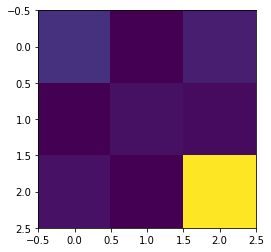

In [62]:
cm=compute_confusion_matrix(test_labels,rf_pred)
plt.imshow(cm)

In [63]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(test_labels, rf_pred)
print("kappa: ")
print(kappa)

kappa: 
0.6376112200271452
